# K-modes

K-mode is a variation of the k-means algorithm, adapted to deal with categorical features, the algorithm works like this : 
1. Utiliser une simple mesure de dissimilarité de correspondance pour les objets catégoriels,
2. Remplacer les moyens des clusters par les modes
3. Utiliser une méthode basée sur la fréquence pour actualiser les modes

# Commenet ça marche ?

Soit $x_{11}, x_{12},...,x_{nm}$ l'ensemble de données constitué de n objets avec m attributs. L'objectif principal de l'algorithme de kmodes est de regrouper les objets de données X en K clusters en minimisant la fonction de coût suivantes.

$$P(W,Q)=\sum_{l=1}^{k}\sum_{i=1}^{n}w_{il}d_{sim}(x_{i},q_{l})$$
Where $w_{fl}$ is an $N*K$ matrix where each element belongs to 0 or 1. $N$ is the total number of data objects and k is number of clusters. $d_{sim}(x_{i},q_{l})$ est la mésure de dissmiliraté et elle définie ainsi 
$$d_{sim}(x_{i},q_{l})=\sum_{j=1}^{m}\delta (x_{lj,q_{lj}})$$.
Le $\delta (x_{lj,z_{lj}})$ qui est la dissimiliraté est caluclé ainsi :
$$\delta (x_{lj,q_{lj}}) = \left\{\begin{matrix}
1 & si & x_{lj}=q_{lj}   \\ 
0 & si & x_{lj}\neq q_{lj}  
\end{matrix}\right.$$

# Déroulement de l'algorithme

**Étape 1** : Sélectionner au hasard les K modes initiaux des objets de données de telle sorte que Cj, j = 1,2,...,K 

**Étape 2** : Trouver la dissimilitude correspondante entre les K modes initiaux de chaque grappe et chaque objet de données en utilisant l'équation (2).

**Étape 3** : Évaluer l'adéquation à l'aide de l'équation (1)

**Étape 4** : Trouver les objets les plus proches des modes de regroupement initiaux.

**Étape 5** : Affecter les objets de données aux modes de centroïde de grappe les plus proches.

**Étape 6** : Mettre à jour les modes en appliquant la méthode basée sur la fréquence aux grappes nouvellement formées. 

**Étape 7** : Répétez les étapes 2,3,4 et 5 jusqu'à ce qu'il n'y ait plus de changement dans le vaisseau des objets de données. 

**Sortie** : Objets de données en cluster

# Exemple de k-mode vs k-means

Dans cette exemple on déroule k-means sur un dataset de cancer de sain 

In [94]:
import pandas as pd 

df = pd.read_csv('bankmarketing.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [95]:
df = df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
df['age_bin'] = pd.cut(df['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
df  = df.drop('age',axis = 1)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [96]:
df_copy = df.copy()

In [92]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster
0,3,1,0,0,0,0,1,6,1,1,4,1
1,7,1,3,1,0,0,1,6,1,1,4,1
2,7,1,3,0,2,0,1,6,1,1,2,0
3,0,1,1,0,0,0,1,6,1,1,2,0
4,7,1,3,0,0,2,1,6,1,1,4,1


## Initialisation en K-modes 
Il existe trois type d'initialisation dans la litérature en k-modes
* Initialisation de Huang[1997, 1998] : la seconde méthode calcule les fréquences de toutes les catégories pour tous les attributs et attribue les catégories les plus fréquentes de manière égale aux K-modes initiaux.
* Initialisation de Cao al. [2009] : la méthode d'initialisation prend en compte la distance entre les objets et la densité des objets. elle sélectionne l'objet ayant la densité moyenne maximale comme premier centre de regroupement initial. Pour le calcul des autres centres de grappes, la distance entre l'objet et les grappes déjà connues, et la densité moyenne de l'objet sont prises en compte.La méthode vise à choisir un centre de grappes diversifié qui peut améliorer le regroupementrésultats, mais un critère uniforme pour la sélection des centres de clusters K-initial n'est pasfournis.
* Initlisation aléatoire: initilisation aléatoire

### Using K-Mode with "Cao" initialization

In [84]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [85]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [86]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [87]:
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


In [172]:
import numpy as np
import matplotlib.pyplot as plt 
cost_huang = []
cost_cao = []
cost_rand = []
for num_clusters in list(range(1,10)):
    kmode_cao = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=0)
    km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=0)
    km_rand = KModes(n_clusters=2, init = "random", n_init = 1, verbose=0)
    kmode_cao.fit_predict(df)
    km_huang.fit_predict(df)
    km_rand.fit_predict(df)
    cost_cao.append(kmode_cao.cost_)
    cost_huang.append(km_huang.cost_)
    cost_rand.append(km_rand.cost_)
x = np.array([i for i in range(1,10,1)])

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

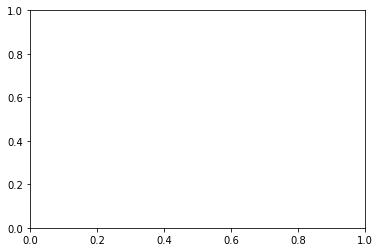

In [126]:

plt.plot(x, cost_cao, label = "cost_cao")
plt.plot(x, cost_huang, label = "cost_huang")
plt.plot(x, cost_rand, label = "cost_rand")
plt.xlabel('nombre de centres k')
plt.ylabel('cost function ')
plt.legend()
plt.show()

In [171]:
km_cao = KModes(n_clusters=2, init = "random", n_init = 1, verbose=0)
start_time = time.time()
fitClusters_cao = km_cao.fit_predict(df)
end_time = time.time()
end_time-start_time

21.97610640525818

In [145]:
#Attacher la catégorie au dataframe
df_viz = df_copy
df_viz['cluster']=fitClusters_cao

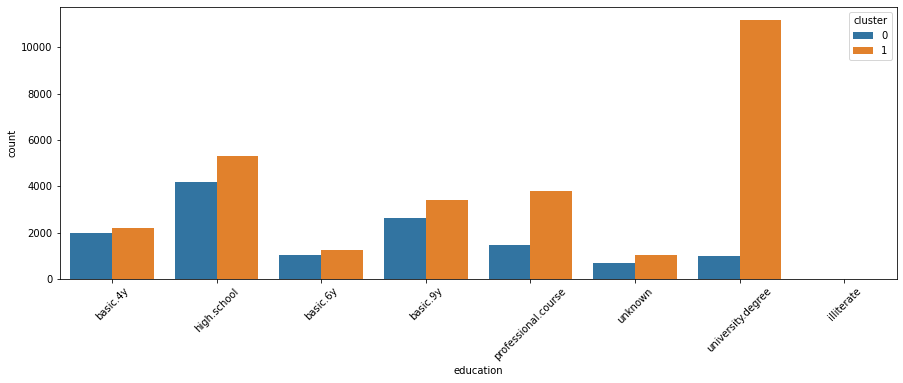

In [147]:
plt.subplots(figsize = (15,5))
g = sns.countplot(data=df_copy,x="education",hue="cluster",orient="h")
plt.xticks(rotation=45);

In [181]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns
clusterCentroidsDf

,cluster,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_nonexistent,poutcome_success,age_bin_20-30,age_bin_30-40,age_bin_40-50,age_bin_50-60,age_bin_60-70,age_bin_70-80,age_bin_80-90,age_bin_90-100
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Compraison de la vitessse 

Il est démontré que l'algorithme permet d'obtenir une convergence avec les la complexité temporelle en ce qui concerne le nombre d'objets de données. Les hauteurs soulignent également qu'en général, l'algorithme des modes K est plus rapide que l'algorithme des moyennes K car il nécessite moins d'itérations pour converger.

Dans cette partie on va comparer la vitesse d'un k-means appliqué sur les donnée encodé en oneHotencoding et l'algorithme k-mode

In [167]:
df = df_copy.copy()#get backup value
df = pd.get_dummies(df,drop_first=True)
df

,cluster,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_nonexistent,poutcome_success,age_bin_20-30,age_bin_30-40,age_bin_40-50,age_bin_50-60,age_bin_60-70,age_bin_70-80,age_bin_80-90,age_bin_90-100
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
41184,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
41185,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [168]:
from sklearn.cluster import KMeans
import time 

start_time = time.time()
fitClusters_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(df)
end_time = time.time()
end_time-start_time

1.919748306274414

In [144]:
fitClusters_kmeans

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

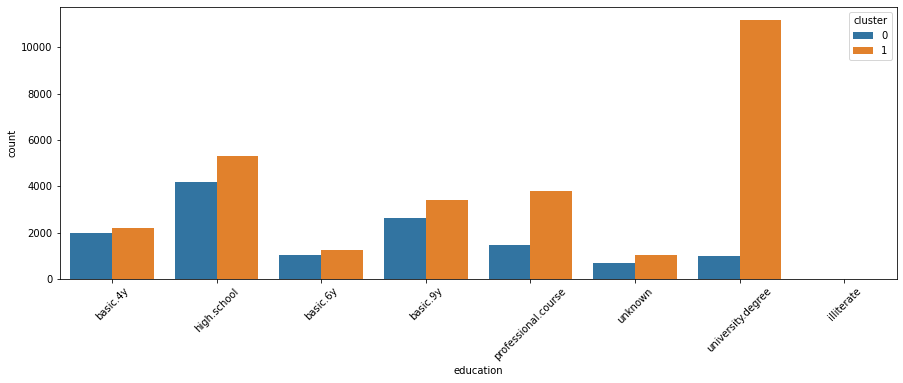

In [148]:
#Attacher la catégorie au dataframe
df_viz = df_copy
df_viz['cluster']=fitClusters_kmeans
plt.subplots(figsize = (15,5))
g = sns.countplot(data=df_viz,x="education",hue="cluster",orient="h")
plt.xticks(rotation=45);

Une meilleure etude des cluster consisetra a les caractésisé avec les variables qualtitatives et les modalité de chaque variables en utilisant les test statistiques. 

In [173]:
from sklearn import metrics

In [180]:
metrics.silhouette_score(fitClusters_kmeans, metric='euclidean')

TypeError: silhouette_score() missing 1 required positional argument: 'labels'

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,70-80
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,40-50
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,50-60
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,40-50
